# NETFLIX CASE STUDY 

##### By Phalguni Shendye 

---------------------------------------------------------------------------------------------------------------------------

Over the history of Netflix, the company has maintained a content catalog that was earlier delivered via mail. When the technology infrastructure became available Netflix pioneered video technology, which revolutionized home-based video entertainment forever.

In this case study, we will have a look at -

 * How netflix has progressed over the years
 * The type of content the viewers like to consume today 
 * The top contries contributing to 80% of the content on the platform 
 * The popular actors, directors on the platform
 * The ideal months for the release of a new movie / show
 
 and various other things.

-------------------------------------------------------------------------------------------------------------------------------

This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc

In [99]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px
import warnings

In [2]:
netflix_df = pd.read_csv('netflix.csv')

In [133]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021


In [135]:
netflix_movies=netflix_df[netflix_df['type']=='Movie']

In [95]:
netflix_shows=netflix_df[netflix_df['type']=='TV Show']

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [71]:
# finding the unique values
netflix_df.nunique()

show_id             8790
type                   2
title               8790
director            4527
cast                7679
country              749
date_added          1713
release_year          74
rating                14
duration             220
listed_in            513
description         8758
month_added           12
month_name_added      12
year_added            14
dtype: int64

In [10]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
#replacing and dropping nan values

netflix_df['cast'].replace(np.nan, 'No Data',inplace  = True)
netflix_df['director'].replace(np.nan, 'No Data',inplace  = True)
netflix_df['country'].replace(np.nan,'No Data',inplace=True)


In [12]:
netflix_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [13]:
netflix_df.dropna(inplace=True)

In [16]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [17]:
#converting date and adding more columns

netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df['month_name_added']=netflix_df['date_added'].dt.month_name()
netflix_df['year_added'] = netflix_df['date_added'].dt.year

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


We have tried to analyze the shape and size of data and tried to fill the gaps. Now let us use this to answer a few important questions.




### 1. Does Netflix produce more TV shows or Movies ?

In [23]:
#analyzing the overall percetage of tv shows vs movies
netflix_df.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

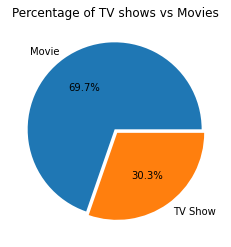

In [33]:
#plotting above values as % in pie chart 
plt.title("Percentage of TV shows vs Movies")
plot1 = plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025),labels=netflix_df.type.value_counts().index,autopct='%1.1f%%')


From the above graph, we can infer that Netflix has produced more movies than Tv shows.

### 2. Which genre is the most popular amongst various movies and tv shows ? 

In [57]:
netflix_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021


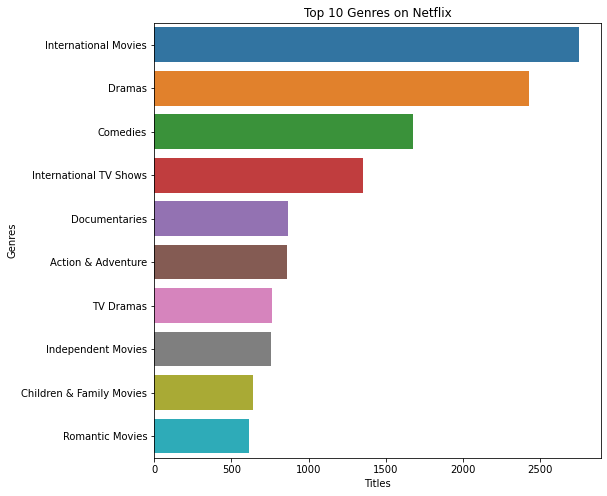

In [53]:
# As one title is listed under various genres, we split them based on indvidual genres
genres_filtered = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

# Now let us plot this using a bar chart to display the top 10 genres
plt.figure(figsize=(8,8))
plot2 = sns.countplot(y = genres_filtered, order=genres_filtered.value_counts().index[:10])

plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

From the above graph we can infer that international movies followed by dramas and comedy are the most popular genres world wide

### 3.  Which countries produce the most content on Netflix ?

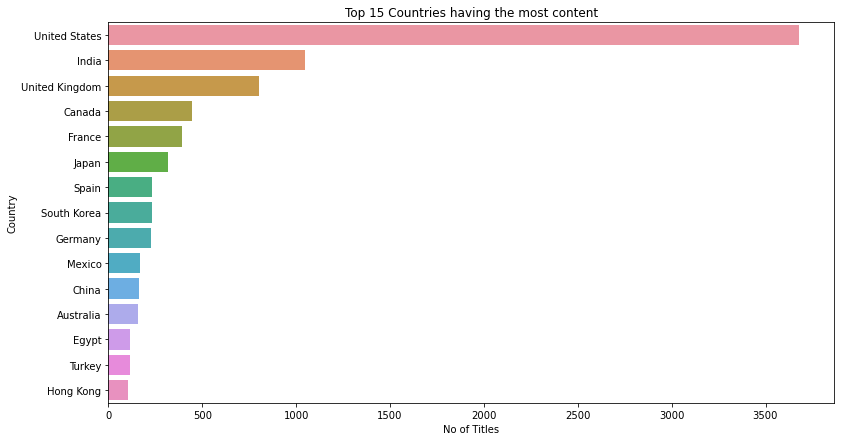

In [56]:
#getting the movie titles and respective country names
countries_filtered = netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
countries_filtered = countries_filtered[countries_filtered != 'No Data']
#plotting the above using a bar chart
plt.figure(figsize=(13,7))
plot3 = sns.countplot(y = countries_filtered, order=countries_filtered.value_counts().index[:15])
plt.title('Top 15 Countries having the most content')
plt.xlabel('No of Titles')
plt.ylabel('Country')
plt.show()

As we can see from the above graph, United states contributes the most to content creation followed by India and UK. There is a big difference between the number of titles produced in the US(more than 3500) vs India (around 1100)

### 4. Which year had the most number of releases ? What is the trend over the years ? 

In [132]:
#netflix_df.head(1)

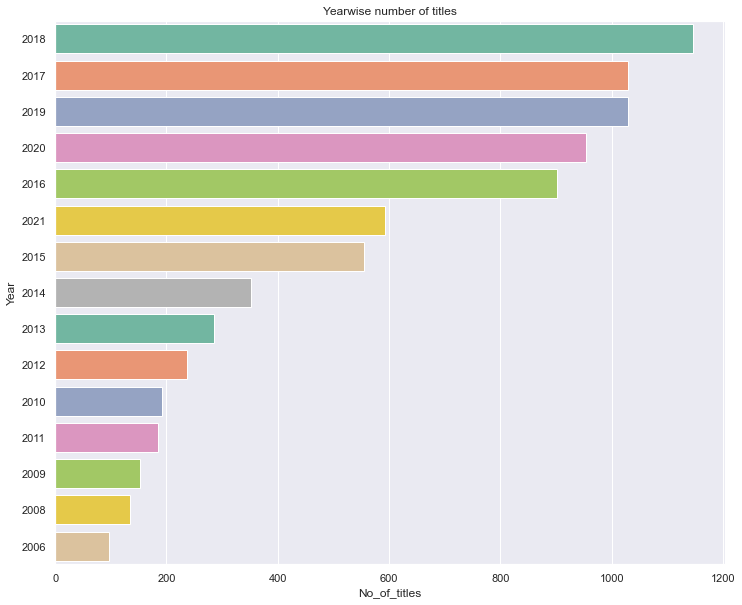

In [69]:
# let us plot the yearwise number of titles
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
plot4 = sns.countplot(y="release_year", data=netflix_df, palette="Set2", order=netflix_df['release_year'].value_counts().index[0:15])
plt.title('Yearwise number of titles')
plt.xlabel('No_of_titles')
plt.ylabel('Year')
plt.show()

From the above graph, we can see that 2018 was the year when most number of movies/tv shows were released. 

In [ ]:
#plotting an area chart to observe the trend of content release over the years

In [90]:
df_1 = netflix_df.query("release_year >= 2007")
df_1 = df_1.groupby("release_year")["show_id"].count().reset_index()

plot5 = px.area(df_1, x='release_year', y='show_id',title='Overall Content Release Trend')
plot5.show()

Launch of streaming video service by Neflix was done in the year 2007.
In 2007, Netflix introduced streaming media and video on demand. We see a slow rise in the beginning but then it picked up in 2014-2015 and there is a rapid increase till 2018.

Helped by the launch of streaming video, 2007 was the first time in the history of Netflix that it generated upwards of $1 Billion in revenue. As we can see, the number of content started increasing gradually as well which peaked in the year 2018.

By 2018, the content on netlix was 13 times of 2007 year's content. But it has declined since 2019 since the beginning of covid. The other factor could be - in 2019, Disney plus was also launched. Films and television series produced by The Walt Disney Studios and Walt Disney Television, such as Marvel movies moved to Disney plus.



### 5. Which rating has the most number of movies/shows?

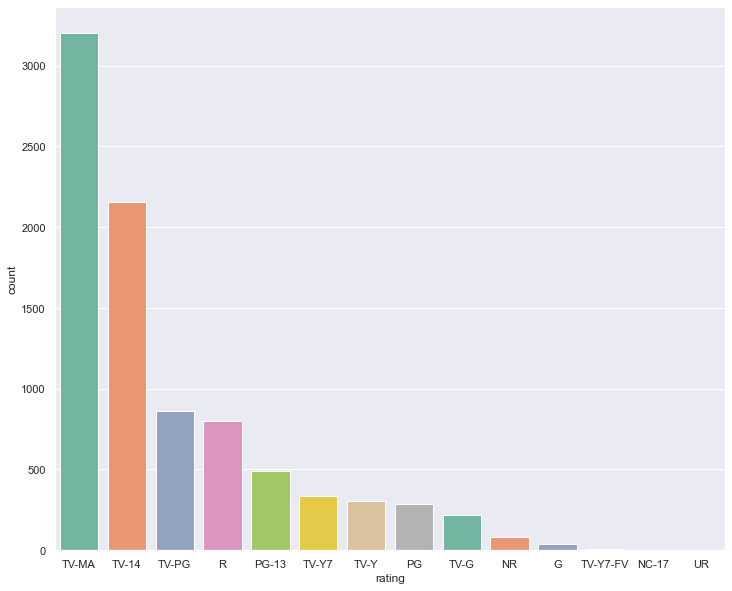

In [91]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
plot6 = sns.countplot(x="rating", data=netflix_df, palette="Set2", order=netflix_df['rating'].value_counts().index[0:15])

Here we can see that a large amount of content is produced under 'TV-MA' rating. "TV-MA" is a rating assigned by the TV Parental guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is "TV-PG". TV-PG means that a show can be viewed by younger audiences but shouldn’t be seen without their parents in the room.

4th largest is the very popular 'R' rating. An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

### 6. What is the average duration of movies on Netflix ?

In [136]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)

<ipython-input-136-db69d60ea659>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-136-db69d60ea659>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='duration', ylabel='Density'>

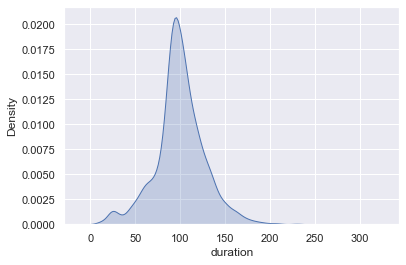

In [137]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

From the above graph, we can infer that a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.

### 8. Who are the top TV actors on Netflix based on the number of titles ?

In [119]:
# finding the most popular actor in tv shows based on the number of tvshows/movies he/she has appeared in
filtered_cast = netflix_shows[netflix_shows.cast != 'No Data'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

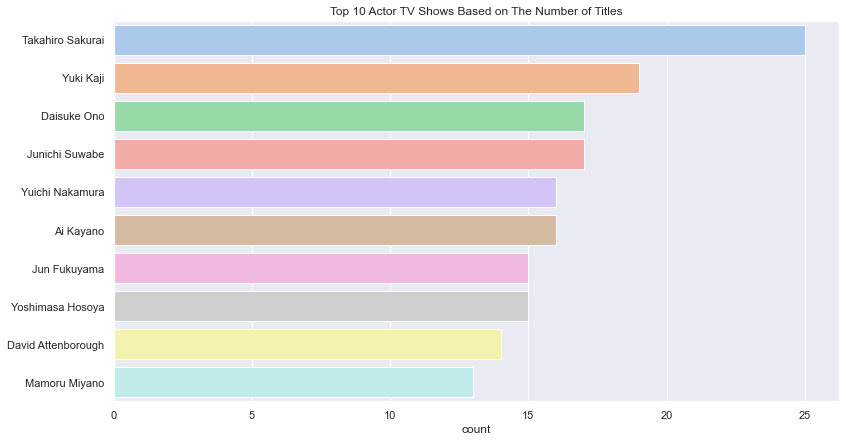

In [120]:
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='pastel')
plt.show()

Takahiro Sakurai is a famous Japanese voice actor, narrator, and radio personality from Japan who has voiced a wide range of popular anime characters throughtout his career and has also won numerous awards.

### 9. Who are the top movie actors on Netflix based on the number of titles ?

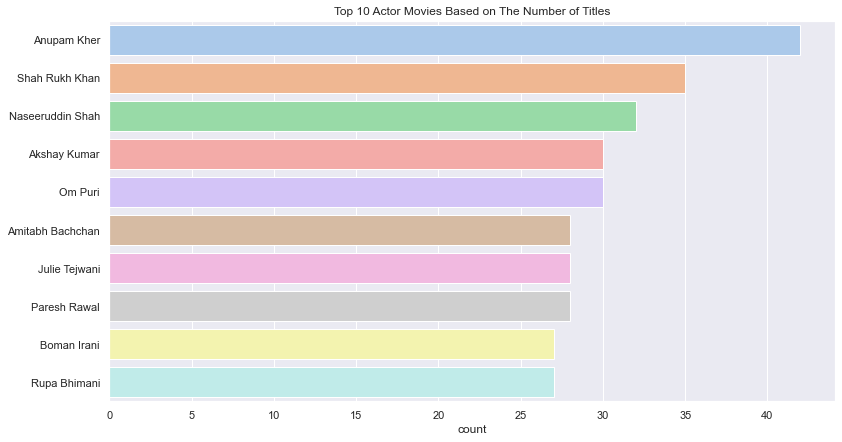

In [121]:
filtered_cast_movie = netflix_movies[netflix_movies.cast != 'No Data'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.show()

Indian actor Anupam Kher has appeared in most number of movies on Netflix. There is no wonder that all the top 10 actors are Indians as India produces more films annually than any country in the world, and Netflix has made many of them more accessible than ever.

### 10. Who are the top 10 directors on Netflix based on the number of titles ?

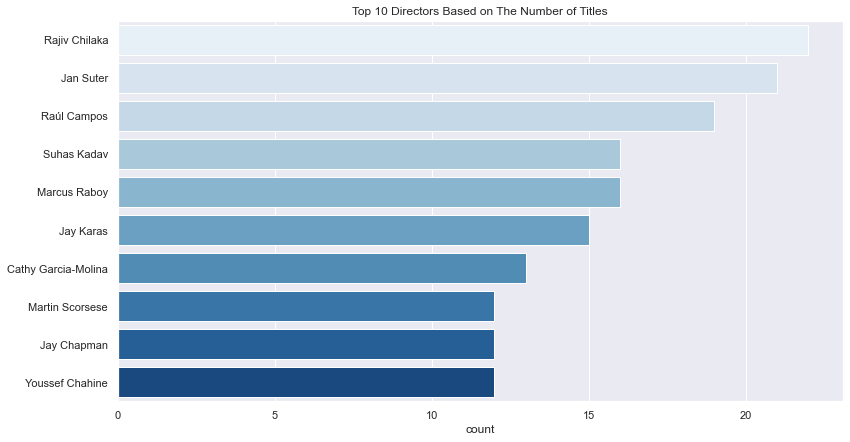

In [122]:
filtered_directors = netflix_df[netflix_df.director != 'No Data'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Directors Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.show()

Rajiv Chilaka who has the most number of titles on Netflix, is the owner of Green Gold Animation Pvt Ltd, a Hyderabad-based Indian Animation company.

A pioneer in generating initial Indian IP Animation content is Green Gold Animation (GGA). GGA's shows have been popular for more than 10 years across all major TV channels–Cartoon Network, Pogo, Discovery Kids, Hungama, and Disney. Animations generated by this manufacturing house have more than 60 million spectators, especially children between the ages of 02-13.

Green gold animations are being viewed in 12 different countries, including the Middle East, Southeast Asia, Canada and the United States. 

### 10. Which month sees the most number of releases worldwide ?

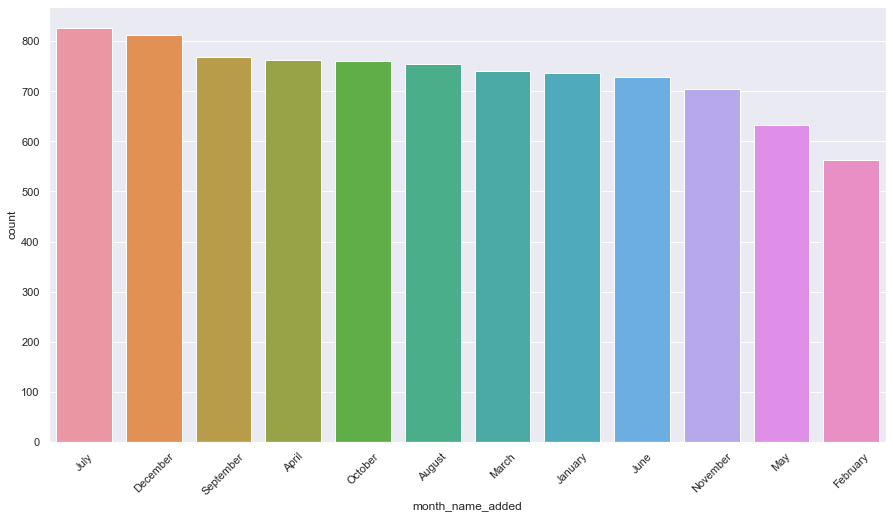

In [131]:
sns.set()
plt.figure(figsize=(15,8))
sns.countplot(x="month_name_added",data= netflix_df,order = netflix_df['month_name_added'].value_counts().index[0:12])
plt.xticks(rotation=45)
plt.show()

The above graph clearly shows that new movies and tv shows are released in the months of December and July. From our earlier analysis it can be seen that most content comes from the US, and americans have summer breaks in July to Sept and winter breaks in December, in all of these months we can see more number of new releases. 

### 11. Which month is the best to release a new tv show or movie ? (Trend over the years)

In [129]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

df_final = netflix_df.groupby('year_added')['month_name_added'].value_counts().unstack().fillna(0)[month_order].T


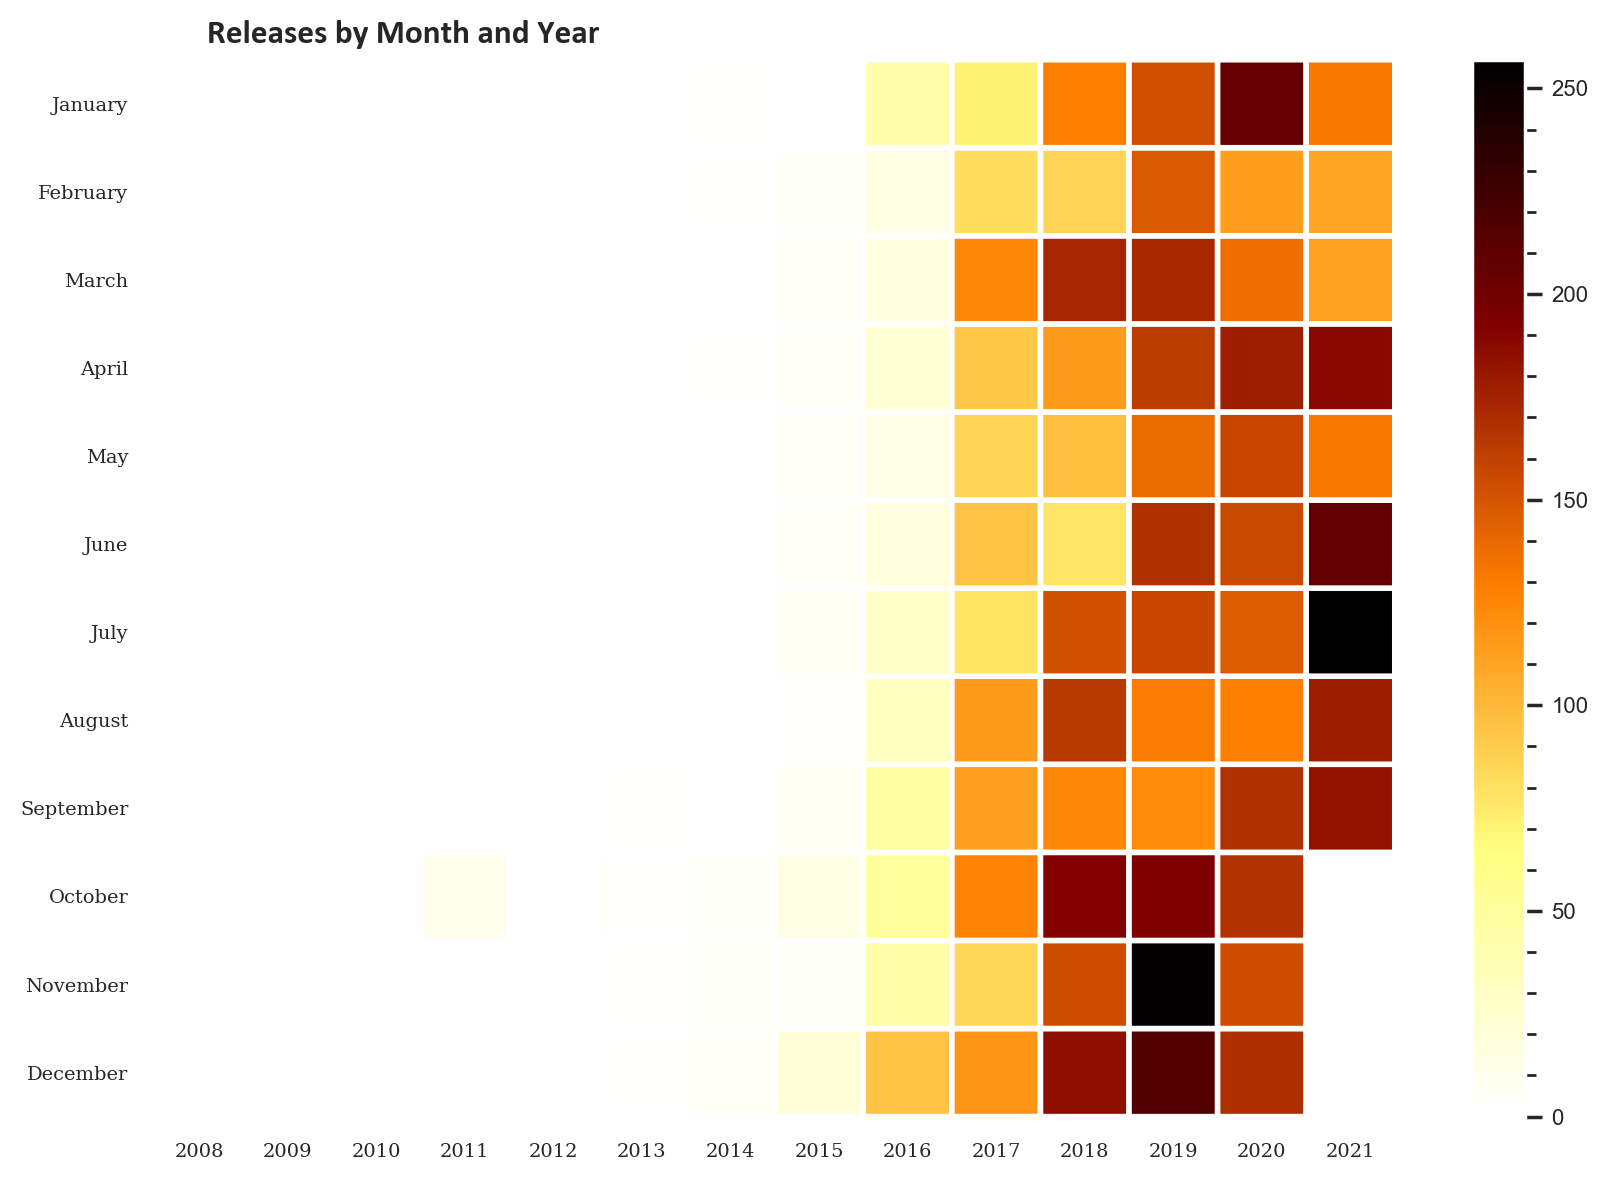

In [139]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df_final, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df_final.columns), 1), df_final.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df_final.index), 1), df_final.index, fontsize=7, fontfamily='serif')

plt.title('Releases by Month and Year', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

If the year 2018 (when most number of movies/shows were released) is considered, we can see that the months of February, April, May and June saw the least number of releases. These months could be a good option to try and launch a new show or movie because  the competition would be comparitively low as compared to other months.

### Insights : 

* Movies (69.7% )contribute more to the content on Netflix than TV shows (30.3%)
* People like watching more movies under the international category. Hence international movies followed by drama and comedy are the most popular genres worldwide.
* If we consider TV shows and movies together then United states contributes the most to content creation followed by India and UK. There is a big difference between the number of titles produced in the US(more than 3500) vs India (around 1100).
* The year 2018 saw a huge number of releases. By 2018, the content on netlix was 13 times of 2007 year's content. But it has declined since 2019 - the beginning of covid. The other factors could be - in 2019, Disney plus was also launched. Films and television series produced by The Walt Disney Studios and Walt Disney Television, such as Marvel movies were moved to Disney plus.
* A large amount of content is produced under 'TV-MA' rating. "TV-MA" is a rating assigned by the TV Parental guidelines to a television program that was designed for mature audiences only. It's followed by 'TV-14' which stands for content that may be inappropriate for children younger than 14 years of age. R-rated movies stand at 4th position.
* Majority of movies on Netflix are among the duration of 75-120 mins. The running-time rule of thumb is that comedies are 90 minutes, dramas 1.5 to 2 hours and Oscar-winners however long they please.
* Takahiro Sakurai who has the most number of movies - is a famous Japanese voice actor, narrator, and radio personality from Japan who has voiced a wide range of popular anime characters throughtout his career and has also won numerous awards.
* Indian actor Anupam Kher has appeared in most number of movies on Netflix. There is no wonder that all the top 10 actors are Indians as India produces more films annually than any country in the world, and Netflix has made many of them more accessible than ever.
* Rajiv Chilaka who has the most number of titles on Netflix, is the owner of Green Gold Animation Pvt Ltd, a Hyderabad-based Indian Animation company which is a pioneer in generating initial Indian IP Animation content. GGA's shows have been popular for more than 10 years across all major TV channels–Cartoon Network, Pogo, Discovery Kids, Hungama, and Disney. Animations generated by this manufacturing house have more than 60 million spectators, especially children between the ages of 02-13. Green gold animations are being viewed in 12 different countries, including the Middle East, Southeast Asia, Canada and the United States.
* Most New movies and tv shows are released in the months of December and July. From our earlier inference, it can be seen that most content comes from the US, and americans have summer breaks in July to Sept and winter breaks in December hence in all of these months we can see more number of new releases. 


### Recommendations : 

* When it comes to an ideal time to release or experiment with a new content, April to June and February seem to be the best months as the competition would be compartively low. If the year 2018 (when most number of movies/shows were released) is considered, we can see that the months of February and April to June saw the least number of releases.
* The demographics of a country should be closely observed before deciding which rated content is watched the most, for example - average age of India is 28.7 years so the content should be more directed towards adults and teens. 
* The ideal duration of a movie on netflix which would keep the user hooked is about 90 to 120 minutes which is a sweet spot for many major motion pictures. The running-time rule of thumb is that comedies are 90 minutes, dramas two hours and Oscar-winners however long they please. New YouGov research reveals that the ideal movie length is below the current average. 55% of British people say the ideal movie is under two hours long, with the most popular running time between an hour and a half and two hours.
